In [28]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np
from matplotlib import pyplot as plt

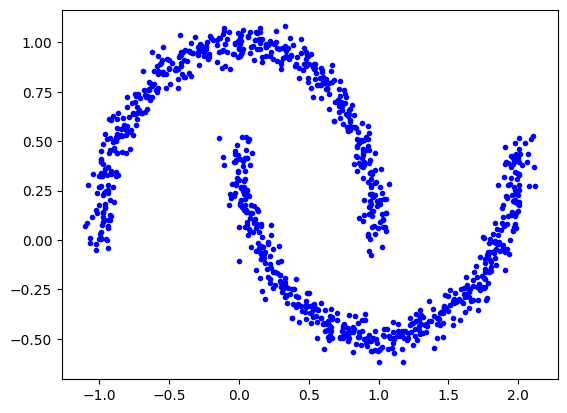

In [29]:
X,y=make_moons(n_samples=1000,noise=0.05,random_state=42)
plt.plot(X[:,0],X[:,1],'b.')

In [30]:
dbscan=DBSCAN(eps=0.05,min_samples=5) # eps表示半径，
dbscan.fit(X)

DBSCAN(eps=0.05)

In [31]:
dbscan.labels_[:20] # 负数表示离群点

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4], dtype=int64)

### 核心对象索引

In [32]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

### 簇的个数

In [33]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [34]:
dbscan2=DBSCAN(eps=0.3,min_samples=5) # eps表示半径，
dbscan2.fit(X)

DBSCAN(eps=0.3)

In [35]:
def plot_dbscan(dbscan,X,size,show_xlabels=True,show_ylabels=True):
    core_mask=np.zeros_like(dbscan.labels_,dtype=bool)
    core_mask[dbscan.core_sample_indices_]=True
    anomalies_mask=dbscan.labels_==-1
    non_core_mask=~(core_mask|anomalies_mask)
    cores=dbscan.components_
    anomalies=X[anomalies_mask]
    non_core=X[non_core_mask]
    plt.scatter(cores[:,0],cores[:,1],c=dbscan.labels_[core_mask],marker='o',s=size,cmap='Paired')
    plt.scatter(cores[:,0],cores[:,1],c=dbscan.labels_[core_mask],marker='*',s=20)
    plt.scatter(anomalies[:,0],anomalies[:,1],c='r',marker='x',s=100)
    plt.scatter(non_core[:,0],non_core[:,1],c=dbscan.labels_[non_core_mask],marker='.')
    if show_xlabels:
        plt.xlabel('$ x_1 $',fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.xlabel('$ x_2 $',fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    plt.title('eps={:.2f},min_samples={}'.format(dbscan.eps,dbscan.min_samples),fontsize=14)

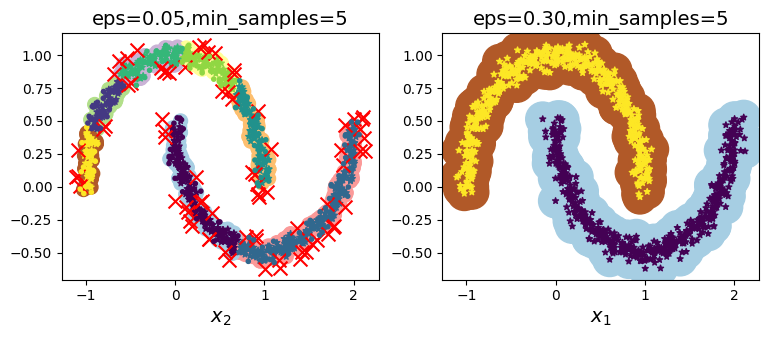

In [36]:
plt.figure(figsize=(9,3.2))
plt.subplot(121)
plot_dbscan(dbscan,X,size=100)
plt.subplot(122)
plot_dbscan(dbscan2,X,size=600,show_ylabels=False)
plt.show()